# Predict Career Longevity for NBA Rookies

![Basketball](https://i.imgur.com/YIaYQ8C.png)

The project is binary classification model using Scikit-learn to predict if the NBA rookie will last for 5 years in the league if provided with some information such as Games played, assists, steals and turnovers …. etc. 

---

Dataset Source : [Data world](https://data.world/exercises/logistic-regression-exercise-1)

## We will focus on :
    
    1) features selection using heatmap correlation
    2) Logistic regression



# Part 1: Import libraries and load the data 

## Import libraries

In [3]:
# import pandas as pd # load and manipulate data 
# import numpy as np # calculate the mean and standard deviation
# import matplotlib.pyplot as plt # drawing graphs
# from sklearn.model_selection import train_test_split # split  data into training and testing sets
# from sklearn.linear_model import LogisticRegression # import Logistic regression from sklearn

# import sklearn.metrics as metrics # import metrics 
# import seaborn as sns # import seaborn for visualization 
# from sklearn.preprocessing import MinMaxScaler #import min max scaler

# from sklearn.metrics import confusion_matrix#confusion matrix
# from yellowbrick.classifier import ROCAUC#Discriminationthreshold

In [3]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset 

In [4]:
nba = pd.read_csv('./data/nba_logreg.csv')

In [5]:
nba.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


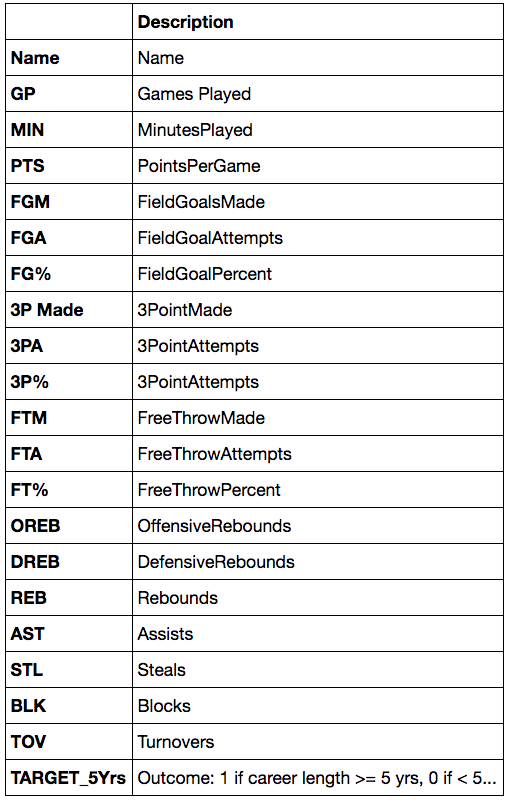

In [9]:
#Import the description table

from IPython.display import Image # library to import image

Image('table.png')

In [6]:
#dataframe info
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [8]:
nba.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,1340,1294,Charles Smith,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GP,1340.0,NaN,NaN,NaN,60.41,17.43,11.0,47.0,63.0,77.0,82.0
MIN,1340.0,NaN,NaN,NaN,17.62,8.31,3.1,10.88,16.1,22.9,40.9
PTS,1340.0,NaN,NaN,NaN,6.8,4.36,0.7,3.7,5.55,8.8,28.2
FGM,1340.0,NaN,NaN,NaN,2.63,1.68,0.3,1.4,2.1,3.4,10.2
FGA,1340.0,NaN,NaN,NaN,5.89,3.59,0.8,3.3,4.8,7.5,19.8
FG%,1340.0,NaN,NaN,NaN,44.17,6.14,23.8,40.2,44.1,47.9,73.7
3P Made,1340.0,NaN,NaN,NaN,0.25,0.38,0.0,0.0,0.1,0.4,2.3
3PA,1340.0,NaN,NaN,NaN,0.78,1.06,0.0,0.0,0.3,1.2,6.5
3P%,1329.0,NaN,NaN,NaN,19.31,16.02,0.0,0.0,22.4,32.5,100.0


# Part 2: Data Exploration (Find Insights in the data)

In [10]:
# check class imbalance
nba['TARGET_5Yrs'].value_counts()

1.0    831
0.0    509
Name: TARGET_5Yrs, dtype: int64

We can see that there is a bit imbalance in our data.

In [11]:
# drop null values
nba.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [12]:
nba = nba.dropna()

nba.isnull().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

In [32]:
#Group all the observations by (Target_5yrs)
average_stats = nba.groupby('TARGET_5Yrs').mean()
average_stats = average_stats.T
average_stats

TARGET_5Yrs,0.0,1.0
GP,51.495030,65.826877
MIN,14.276740,19.700847
PTS,5.060636,7.891646
FGM,1.951093,3.051090
FGA,4.562425,6.718523
FG%,42.270775,45.242131
3P Made,0.232406,0.260169
3PA,0.763618,0.799031
3P%,19.378131,19.265496
FTM,0.928231,1.530872


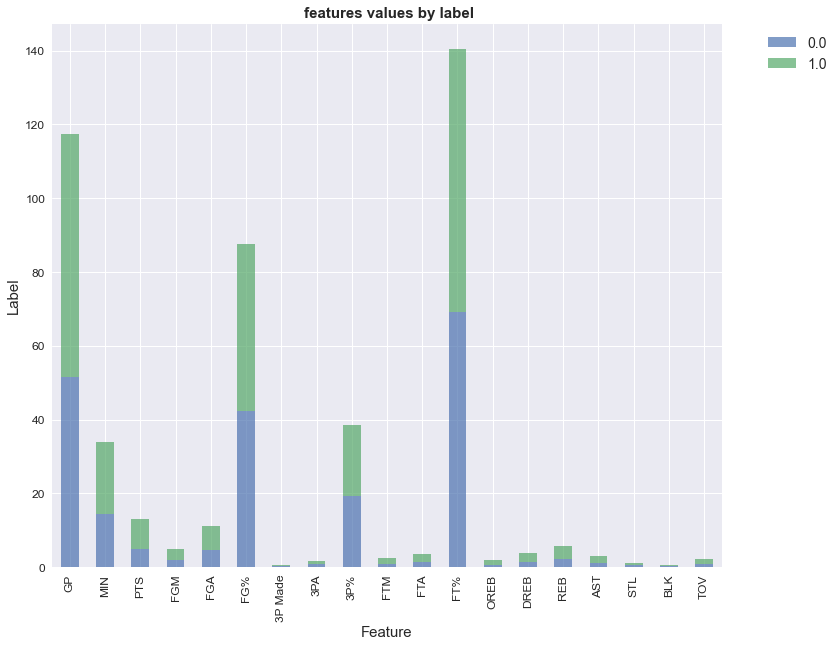

In [41]:
#Visualize the data for insights
plt.style.use('seaborn')
ax = average_stats.plot(kind='bar', stacked=True, figsize=(12, 10), alpha=0.7);

#Decorating the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 14})
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Label', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(' features values by label',fontsize=15,weight='bold');

# Part 3: Features reduction based on correlation

In [42]:
nba.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

In [59]:
# Labels and features split
X = nba.drop(['Name','TARGET_5Yrs'], axis=1)
y = nba['TARGET_5Yrs']

In [60]:
X.head(1)

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3


In [61]:
y.head(1)

0    0.0
Name: TARGET_5Yrs, dtype: float64

In [62]:
#correlation map
nba.corr()['TARGET_5Yrs'].sort_values(ascending=False)

TARGET_5Yrs    1.000000
GP             0.397783
FGM            0.316393
MIN            0.316031
PTS            0.314632
REB            0.300491
FTA            0.296018
FTM            0.295546
OREB           0.294637
FGA            0.290684
DREB           0.285673
TOV            0.270767
FG%            0.235587
STL            0.228931
BLK            0.211751
AST            0.173788
FT%            0.095621
3P Made        0.035025
3PA            0.016151
3P%           -0.003411
Name: TARGET_5Yrs, dtype: float64

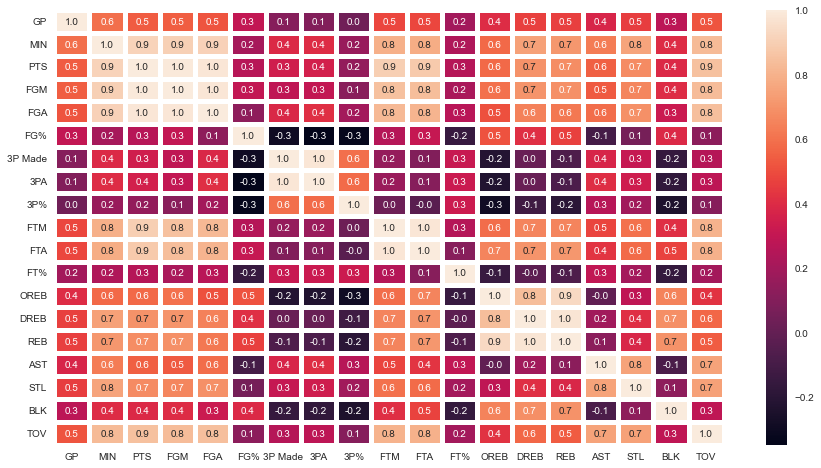

In [63]:
plt.figure(figsize=(15, 8))
sns.heatmap(X.corr(), annot=True, linewidths=5, fmt='.1f');

As many of features have 1-1 correlations, this will make duplicate featues. So we will drop those.

In [64]:
#Drop correlated features
X = X.drop(['FGA', 'FGM', '3PA', 'FTM', 'DREB'], axis=1)

In [65]:
X.head(1)

,GP,MIN,PTS,FG%,3P Made,3P%,FTA,FT%,OREB,REB,AST,STL,BLK,TOV
0,36,27.4,7.4,34.7,0.5,25.0,2.3,69.9,0.7,4.1,1.9,0.4,0.4,1.3


# Part 4:Logistic regression classification

The **discrimination threshold** is the probability or score at which the positive class is chosen over the negative class. Generally, this is set to 50% but the threshold can be adjusted to increase or decrease the sensitivity to false positives or to other application factors.


In [67]:
from sklearn.model_selection import train_test_split

#Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train.shape, X_test.shape

((1063, 14), (266, 14))

### Discrimination threshold plot 

Ref: https://www.scikit-yb.org/en/latest/api/classifier/threshold.html#:~:text=The%20discrimination%20threshold%20is%20the,or%20to%20other%20application%20factors.

+ **Precision**: An increase in precision is a reduction in the number of false positives; this metric should be optimized when the cost of special treatment is high (e.g. wasted time in fraud preventing or missing an important email).

+ **Recall**: An increase in recall decrease the likelihood that the positive class is missed; this metric should be optimized when it is vital to catch the case even at the cost of more false positives.

+ **F1 Score**: The F1 score is the harmonic mean between precision and recall. The fbeta parameter determines the relative weight of precision and recall when computing this metric, by default set to 1 or F1. Optimizing this metric produces the best balance between precision and recall.

+ **Queue Rate**: The “queue” is the spam folder or the inbox of the fraud investigation desk. This metric describes the percentage of instances that must be reviewed. If review has a high cost (e.g. fraud prevention) then this must be minimized with respect to business requirements; if it doesn’t (e.g. spam filter), this could be optimized to ensure the inbox stays clean.

In [80]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import DiscriminationThreshold
import warnings # import warnings

In [81]:
warnings.filterwarnings('ignore')

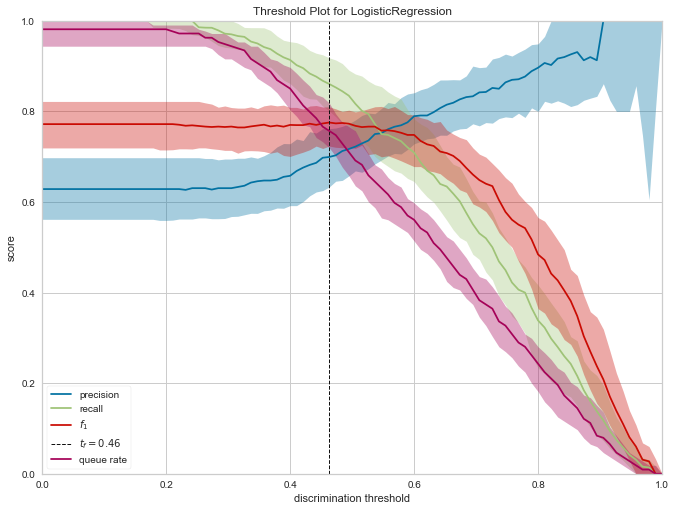

In [83]:
log_model = LogisticRegression()

visualizer = DiscriminationThreshold(log_model, size=(800, 600))
visualizer.fit(X_train, y_train)
visualizer.poof();

In [114]:
#fit the logistic regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [115]:
# labels prediction
threadshold = 0.35

y_pred = clf.predict_proba(X_test)
y_pred = np.where(y_pred[:, 1] > threadshold, 1, 0)

In [116]:
#transform y_pred array to dataframe 
y_pred = pd.DataFrame(y_pred)

In [117]:
y_pred

,0
0,1
1,1
2,1
3,1
4,0
...,...
261,1
262,1
263,1
264,1


## Precision: 
is the ratio of correctly predicted positive observations. The question that tis metric answers is "how many actually survived of all the passengers who are labeled as servived? High precision relates to the low false positive rate. Precision=TP/(TP+FP)
## Recall:
is the ratio of correctly predicted positive observations to the all observations in actual class- The question that the recall answers is : Of all the passengers that truly survived, how many did we label?
Recall=TP/(TP+FN)
## F1 score:
F1 score is the weighted average of precision and recall. therefore this score takse both positives and false negatives into account. intuitively it is not as easy to understand as accuracy, but F1 is actually more useful than accuracy specially when you have an uneven class distribution


# Part 5:Adjust the discrimination threshold

## 1) Confusion matrix for discrimination `threshold of 0.35`

In [118]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score

In [119]:
#F1_Score
f1_score(y_test, y_pred)

0.7890818858560793

In [120]:
#Confusion matrix 
confusion_matrix(y_test, y_pred)

array([[ 22,  79],
       [  6, 159]], dtype=int64)

In [121]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('TN: ', TN)
print('FP: ', FP)
print('FN: ', FN)
print('TP: ', TP)

TN:  22
FP:  79
FN:  6
TP:  159


In [122]:
#test accuracy
accuracy_score(y_test, y_pred)

0.6804511278195489

In [123]:
#precision score
precision_score(y_test, y_pred)

0.6680672268907563

In [124]:
#recall score
recall_score(y_test, y_pred)

0.9636363636363636

## 2) the confusion matrix for discrimination `threshold of 0.8`

In [125]:
#Class label prediction
threadshold = 0.8

y_pred = clf.predict_proba(X_test)
y_pred = np.where(y_pred[:, 1] > threadshold, 1, 0)
y_pred = pd.DataFrame(y_pred)

y_pred

,0
0,0
1,1
2,0
3,1
4,0
...,...
261,0
262,0
263,1
264,1


In [126]:
#F1_Score
f1_score(y_test, y_pred)

0.4684684684684684

In [127]:
#Confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 96,   5],
       [113,  52]], dtype=int64)

In [128]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('TN: ', TN)
print('FP: ', FP)
print('FN: ', FN)
print('TP: ', TP)

TN:  96
FP:  5
FN:  113
TP:  52


In [129]:
#test accuracy
accuracy_score(y_test, y_pred)

0.556390977443609

In [130]:
#precision score
precision_score(y_test, y_pred)

0.9122807017543859

In [131]:
#recall score
recall_score(y_test, y_pred)

0.3151515151515151

+ Precision got increased compared to previous model. However Accuracy and Recall got worse.

## 3) the confusion matrix for discrimination `threshold of 0.2`

In [133]:
#Class label prediction
threadshold = 0.2

y_pred = clf.predict_proba(X_test)
y_pred = np.where(y_pred[:, 1] > threadshold, 1, 0)
y_pred = pd.DataFrame(y_pred)

In [134]:
#F1_Score
f1_score(y_test, y_pred)

0.765661252900232

In [135]:
#Confusion matrix
confusion_matrix(y_test, y_pred)

array([[  0, 101],
       [  0, 165]], dtype=int64)

In [136]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('TN: ', TN)
print('FP: ', FP)
print('FN: ', FN)
print('TP: ', TP)

TN:  0
FP:  101
FN:  0
TP:  165


In [137]:
#test accuracy
accuracy_score(y_test, y_pred)

0.6203007518796992

In [138]:
#precision score
precision_score(y_test, y_pred)

0.6203007518796992

In [139]:
#recall score
recall_score(y_test, y_pred)

1.0

+ We got 100% on Recall as we focus on Recall score for example: detecting like Cancer. We don't want to miss any False Negative cases.